# **Brian Hankins, Mitch Schneider, Chris Beliveau**
# GEO 557 Group Project

# **Subsurface Evaluation of the Powder River Basin Using Python Packages**


# **Abstract**

Untangling and comprehending large datasets can often be a challenge, including LAS data from state websites when evaluating potential oil and gas plays. With interest in the Powder River Basin, the objective was to harvest all available LAS well data within a targeted township section or 1 square mile, then wrangle, clean, and evaluate formation properties using petrophysics. All publicly accessible LAS data was harvested from Section 41N-72W, which spans into both Campbell and Converse counties Wyoming, amounting to 94 wells. 

Python was a great tool to import this raw dataset with non-uniform formatting and clean it to be analyzed quickly and efficiently. The Welly and Pandas packages allowed us to easily wrangle all the data, and showed that many logs had incomplete or unusable data for the project scope. This lead to a reduction of the final working dataset of 20 wells with API numbers, deep subsurface targets, along with at least gamma ray and temperature logs. From this set of 20 wells, only 2 had full suites of petrophysical logs. 

The Lasio package read and processed well logs from LAS files cleanly, allowing for efficient analysis. Stratigraphic zones of potential oil and gas accumulations based on the log values allowed for mapping of potential ‘pay zones' throughout a well. Furthermore, Matplotlib, Seaborn, and Scipy provided a platform to further visulaize and evaluate the data distribution and relationships.   

Utilizing these python tools have identified the presence of hydrocarbons, a strong depth versus temperature relationship, as well as a unimodal distribution of gamma ray values in section 41N-72W Wyoming. Also, the relationship between the photoelectric factor and density indicated a clay dominate lithology in this section. The significance of this work is not only increasing our understanding of the Powder River Basin, but more importantly successfully developing a skillset that can wrangle, clean, and analyze subsurface data to amplify exploration potential. 


# **Introduction**

All members of our group have experience in the Oil & Gas industry, so for our project, we wanted to focus on geological data as it relates to the exploration of hydrocarbons. The Powder River Basin in Southern Campbell and Northern Converse counties is where Brian Hankins will be doing his thesis work, so we chose that as a study area.

Working with geophysical logs in .las file form is a common practice in both our professional and academic lives. Through the state of Wyoming's public data repository, we were able to mine a subset of LAS files in a focus area, and work to explore the robustness of this dataset, which would further drive the direction we wanted to take this project in. 

In exploring this public dataset, certain unforeseen challenges existed where it would be tough to say how we would use our data until we knew the "extent" of our data. Amongst other things, we used Python to wrangle data to explore our data set, normalize and standardize certain paramaters within our data, come up with meaningful statistics, and vizualize the significance of certain components of our data. 

As will be shown throughout this project, we looked at the extent of our logs from both a macro scale deriving meaningful statistics and information from all LAS files we explored, then on a smaller scale honing in on a specific well's LAS file that had a full data set to analyze.


# **Methods**

***Importing:***


We first consolidated all the imports and python tools of various features we would need to work with our dataset.

In [ ]:
!pip install welly==0.4.7
import welly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import gmean
!pip install lasio
import lasio
!pip install striplog
import striplog
from welly import Project
from welly.defaults import ALIAS
from welly import Well
import welly.quality as q
import seaborn as sns
from google.colab import drive 
from glob import glob
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from IPython.display import HTML
drive.mount('/content/gdrive')

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 81kB 5.1MB/s 
  Created wheel for welly: filename=welly-0.4.7-cp36-none-any.whl size=51556 sha256=9949b92f059911c0379b6717f904491f7c97ad92ca09bb1de9970e6f0578c6c4
  Stored in directory: /root/.cache/pip/wheels/1f/a6/e3/8543907612eab77a66ec2193df115c2580fd863bea3c092a44
  Created wheel for striplog: filename=striplog-0.8.7-cp36-none-any.whl size=83396 sha256=f149e65edd4fb7e9d661225e56eb66d173f6b1d0d56354d58829605ccd5f065d
  Stored in directory: /root/.cache/pip/wheels/20/b6/dc/ee41c95d309d463308768f967efeb67884a7b9f6560a127728
Successfully built welly striplog
Mounted at /content/gdrive


Our data source was the Wyoming O&G Conservation Commission LAS Logs from the following website:
(http://pipeline.wyo.gov/LasLogs.cfm?oops=1)

Below is the data we obtained from the Wyoming Oil & Gas Commission from the Powder River Basin in Southern Campbell and Northern Converse counties 41N-72W.

We downloaded the .las files to our computer storing them in a shared Google Drive folder.

Raw import of our dataset from a folder of open source LAS data


In [ ]:
files = glob('/content/gdrive/My Drive/GEOL557 Group Project/LAS Data/*.las')
wells = [Well.from_las(file, index='ft') for file in files]
proj = Project(wells)
proj

/usr/local/lib/python3.6/dist-packages/welly/curve.py:217: UserWarning: Irregular sampling in depth is not supported. Interpolating to regular basis.
  warnings.warn(m)


Index,UWI,Data,Curves
0,49005608900000,16 curves,"LTEN, HVOLTA, GR_CBL, CCL, AMP3FT, TT3FT, AMPCAL, TTCAL, AMP5FT, TT5FT, AMPTEMP, TTTEMP, ATT3, BONDIX, TEMP, DTMP"
1,49005611910000,15 curves,"LTEN, GR_CBL, CCL, AMP3FT, TT3FT, AMPCAL, AMP5FT, TT5FT, AMPTEMP, TTTEMP, AMPPS3, ATT3, BONDIX, TEMP, DTMP"
2,49-005-60893,27 curves,"LTEN, HVOLTA, GR, CCL, AMP3FT, TT3FT, AMPCAL, AMP5FT, TT5FT, AMPTEMP, TTTEMP, AMPS1, AMPS2, AMPS3, AMPS4, AMPS5, AMPS6, AMPS7, AMPS8, AMPMIN, AMPMAX, AMPAVG, AMPPS3, ATT3, BONDIX, TEMP, DTMP"
3,49005612060000,10 curves,"C1, C2, C3, C4, C5, GR_MWD, ROP, ROPS, TEMP, TG"
4,49-005-61203,14 curves,"GR, CCL, AMP3FT, TT3FT, AMP5FT, TT5FT, AMPS1, AMPS2, AMPS3, AMPS4, AMPS5, AMPS6, AMPS7, AMPS8"
5,49005613140000,77 curves,"AF10, AF20, AF30, AF60, AF90, AO10, AO20, AO30, AO60, AO90, AT10, AT20, AT30, AT60, AT90, AHFCO60, AHMF, AHORT, AHORX, AHSCA, AHTCO10, AHTCO20, AHTCO30, AHTCO60, AHTCO90, AHTD1, AHTD2, AHTRT, AHTRX, CDF, CFTC, CNTC, CTEM, DCAL, DNPH, DPHZ, DPH8, DSOZ, DTCO, DTSM, ECGR, ED, GDEV, GR, GR_EDTC, GTEM, HCAL, HDRA, HDRB, HGR, HMIN, HMNO, HNPO, HPRA, HTNP, ITT, ND, NPHI, NPOR, PEF8, PEFZ, PR, PXND_HILT, RHO8, RHOZ, RSOZ, RWA_HILT, RXO8, RXOZ, SP, SPAR, SPHI, STIT, TENS, TNPH, HTNP_SAN, HDPH_SAN"
6,49-005-61315,27 curves,"LTEN, HVOLTA, GR, CCL, AMP3FT, TT3FT, AMPCAL, AMP5FT, TT5FT, AMPTEMP, TTTEMP, AMPS1, AMPS2, AMPS3, AMPS4, AMPS5, AMPS6, AMPS7, AMPS8, AMPMIN, AMPMAX, AMPAVG, AMPPS3, ATT3, BONDIX, TEMP, DTMP"
7,49-005-61324,5 curves,"AMP3FT, AMP5FT, TEMPERATURE, GR, TT3FT"
8,49005614030000,3 curves,"ROPS, GR_MWD, TEMP"
9,49-005-61330,5 curves,"AMP3FT, AMP5FT, TEMPERATURE, GR, TT3FT"



***Wrangling and Cleaning:***


We built a table to display the log data available which allowed for easy QC of the import as well as understand data density

In [ ]:
HTML(proj.curve_table_html( alias=ALIAS))

We needed to update the Welly Alias dictionary to include a few GR mnemonics that were not already present. We then amalgamated the same, or similar, data into one key using the Welly Alias function. After applying the alias function and removing keys not important to us, we were able to consolidate 121 total keys to just 13.

In [ ]:
GR_ALIAS = {'GR': [ 'GR','GAMMA','GR_MWD','GAMA','GR_CBL','HEHG','GRS','HGR-5A','HGR-1A','HGR_STGC','HGR','HCGR','GRQH','GRNP','GRNC','GRN',
'GRGM','GRGC','GRDI','GRDE','GRCO','GRC','GR-A','GR_ARC_FILT','GGCE','EHGR','ECGR','CGR','G','GAB','GAM','GAM1','GAPI','GR_AR','GR_STGC','GR1',
'GR-1A','GR2','GR-5A','GRA','GRDA','GRG','GRGS','GRH','GRHD','GRI','GR-I','GRLL','GRML','GR-ML','GRP','GRPD','GRR','GR-R','GRSD','GRSL','GRZ',
'GRZD','HHGR','HSGR','MGR','P01LGR','P02LGR','P03LGR','RGR','SGR','SGRD','GCPS','GRM1']}
             

In [ ]:
ALIAS.update(GR_ALIAS)
ALIAS 

In [ ]:
df_alias = proj.df(keys=['GR', 'CAL', 'DT', 'SP', 'DENS', 'PE', 'AT90', 'RESD', 'RESM', 'RESS', 'PHIN', 'PHID', 'TEMP'], alias=ALIAS) 
df_alias.describe()

,GR,CAL,DT,SP,DENS,PE,AT90,RESD,RESM,RESS,PHIN,PHID,TEMP
count,568882.000000,43323.000000,12407.000000,33239.000000,33142.000000,33142.000000,33222.000000,33222.000000,33222.000000,33042.000000,32901.000000,33174.000000,200334.000000
mean,88.877689,33.732949,80.695587,-272.422255,2.267067,6.614531,133.554288,133.554288,62.482865,2921.943325,0.315898,-0.120183,120.565460
std,31.678665,143.648367,11.131716,34.086513,36.128089,36.350657,356.298054,356.298054,253.341486,2369.828244,0.240721,22.034291,43.844529
min,0.000000,-9.653400,55.390400,-342.083300,-5202.494600,-5204.210100,0.119500,0.119500,0.290500,0.066500,-0.101300,-4013.238900,-37.940000
25%,66.111300,-5.042200,72.901650,-296.041700,2.429000,3.052950,10.576550,10.576550,7.293200,22.574975,0.215500,-0.015400,87.755525
50%,88.307800,-0.034400,78.384700,-265.504200,2.544600,10.000000,23.615650,23.615650,11.036900,4977.499500,0.254400,-0.010400,118.085900
75%,110.557600,0.303900,86.738100,-255.625000,2.628075,10.000000,61.298750,61.298750,23.007875,4998.692275,0.319300,-0.008300,150.913375
max,409.746100,2306.520000,138.486700,186.578900,4.628800,10.000000,1950.000000,1950.000000,1950.000000,5000.037100,7.908500,4.462500,534.999500


The table below is the resulting product of the alias and removal of non-important keys. Also included are color indicators which display certain charactertics about each key. For example, for wells where the TEMP values were all positive, a green dot appears, when a negative TEMP exists, a red dot appears. This feature allows us to identify any wells that may contain spurious data.

In [ ]:
tests = {
#    'Each': [q.no_gaps],
    'GR': [q.no_monotonic, q.no_flat, q.all_positive],
    'DT': [q.all_positive, q.all_between(50, 200)],
    'TEMP' : [q.all_positive],
}

In [ ]:
HTML(proj.curve_table_html(keys=['CAL', 'GR', 'DT', 'SP', 'DENS', 'PE', 'RESD', 'RESM', 'RESS', 'PHIN', 'PHID', 'TEMP'], tests=tests, alias=ALIAS))

This was a pivotal moment in exploring the data as we realized only 2 wells had full log suites.

As mentioned in the introduction, it's hard to know what the data plan is until you understand the data. This was a point where we realized our larger dataset would only yield so much information. From here, we explore both the larger dataset as well as a specific well with a complete dataset.

In [ ]:
df3=df_alias.reset_index() #Here we create a new dataframe with an index reset 
df3

,UWI,Depth,GR,CAL,DT,SP,DENS,PE,AT90,RESD,RESM,RESS,PHIN,PHID,TEMP
0,49005608900000,35.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.6006
1,49005608900000,35.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.6054
2,49005608900000,35.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.5971
3,49005608900000,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.5865
4,49005608900000,36.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.5919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574072,49-009-29464,7568.50,26.4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574073,49-009-29464,7568.75,26.7819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574074,49-009-29464,7569.00,27.7317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574075,49-009-29464,7569.25,29.5161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalizing UWI to have the same format

In [ ]:
df3 = df3.replace('-', '', regex=True).astype(object) #Need to change the UWI key to an Object data type
df3.UWI.unique() #This shows us all the unique UWI

array(['49005608900000', '49005611910000', '4900560893', '49005612060000',
       '4900561203', '49005613140000', '4900561315', '4900561324',
       '49005614030000', '4900561330', '4900561702', '4900561703',
       '4900561706', '49005617330000', '4900561735', '4900929033',
       '4900929083', '4900929103', '4900929088', '4900928430',
       '4900929464'], dtype=object)

In [ ]:
dftemp = df3['UWI'].values 
dftemp = df3['UWI'].str[:10] # Here we trim down the UWI's that contain the extra '0000'
df3['UWI'] = dftemp
df3.UWI.unique()

array(['4900560890', '4900561191', '4900560893', '4900561206',
       '4900561203', '4900561314', '4900561315', '4900561324',
       '4900561403', '4900561330', '4900561702', '4900561703',
       '4900561706', '4900561733', '4900561735', '4900929033',
       '4900929083', '4900929103', '4900929088', '4900928430',
       '4900929464'], dtype=object)

Setting the parameter that a threshold of 3 must be reached to ensure we have at least 3 columns of data to work with for comparison

In [ ]:
df4 = df3.dropna(thresh=3)


In [ ]:
#changing all the dtyapes from object to float64
df5 = df4.astype({'UWI': 'str', 'Depth': 'float64', 'GR': 'float64', 'CAL': 'float64', 'DT': 'float64', 'SP': 'float64', 'DENS': 'float64', 'PE': 'float64',
                  'AT90': 'float64', 'RESD': 'float64', 'RESM': 'float64', 'RESS': 'float64', 'PHIN': 'float64', 'PHID': 'float64', 'TEMP': 'float64'}) 
df5.dtypes

UWI       object
Depth    float64
GR       float64
CAL      float64
DT       float64
SP       float64
DENS     float64
PE       float64
AT90     float64
RESD     float64
RESM     float64
RESS     float64
PHIN     float64
PHID     float64
TEMP     float64
dtype: object

df5 is the final product of our 21 wells, uniform API & condensed aliases.

In [ ]:
df5

,UWI,Depth,GR,CAL,DT,SP,DENS,PE,AT90,RESD,RESM,RESS,PHIN,PHID,TEMP
0,4900560890,35.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.6006
1,4900560890,35.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.6054
2,4900560890,35.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.5971
3,4900560890,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.5865
4,4900560890,36.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.5919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574071,4900929464,7568.25,26.3271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574072,4900929464,7568.50,26.4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574073,4900929464,7568.75,26.7819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574074,4900929464,7569.00,27.7317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Visualization**


The below Kernel plot displays a contrast between PE and Density showing somewhat of a correlation with lower density and lower PE.

Looking at the PE curve, our values of ~2.5-3.5 is indicative of a clay dominated lithology, with the 'tail' of data reaching up to ~5.0 representing the occurance of some calcite dominated lithologies as well. A chart displaying PE and mineral relationships is shown below for reference. We cut the PE limit on the upper end to 6 as values over 6 are generally erroneous or not useful.

Additionally, the majority of the data has a density of ~2.25-2.75 gm/cc.

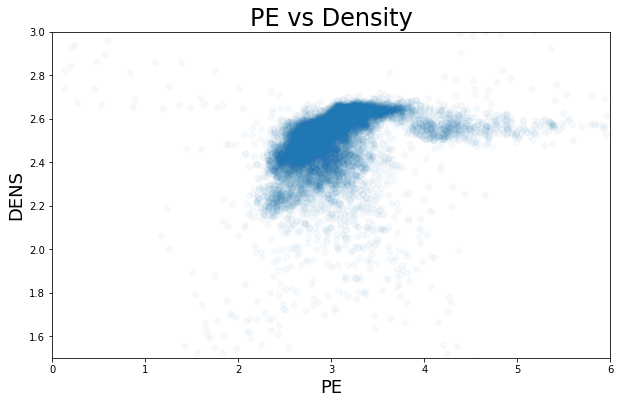

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df5.PE.values, df5.DENS.values, alpha=0.03)
plt.title('PE vs Density', size=24)
plt.xlabel('PE', size=18)
plt.ylabel('DENS', size=18)
plt.xlim((0,6))
plt.ylim((1.5,3))
plt.show()

Image from http://www.kgs.ku.edu/Publications/Bulletins/LA/06_photo.html
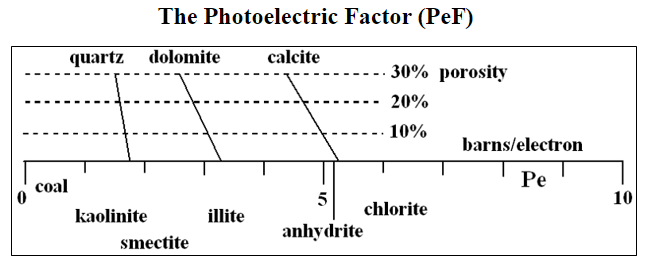

Looking at temperature ranges found from logging tool measurements, we can see overall readings from ~50-250 degrees F.

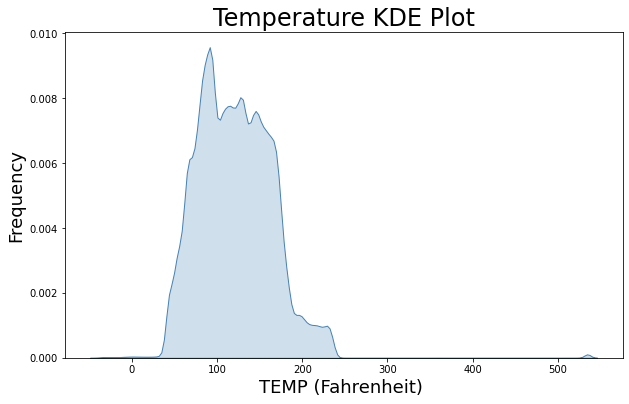

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Temperature KDE Plot', size=24)
plt.xlabel('TEMP (Fahrenheit) ', size=18)
plt.ylabel('Frequency', size=18)
sns.kdeplot(df5.TEMP, color='steelblue', shade=True);

The GR count shows a unimodal, fairly normal, bell-curve distribution.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


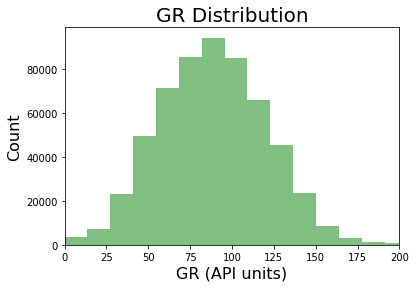

In [ ]:
plt.hist(df5.GR.values, bins = 30, color='g', alpha = 0.5)
plt.xlim(0,200)
plt.xlabel('GR (API units)', size=16)
plt.ylabel('Count', size=16)
plt.title('GR Distribution', size=20);

The below ridge-plot displays the Gamma Ray frequency distribution as it correlates to each individual well.

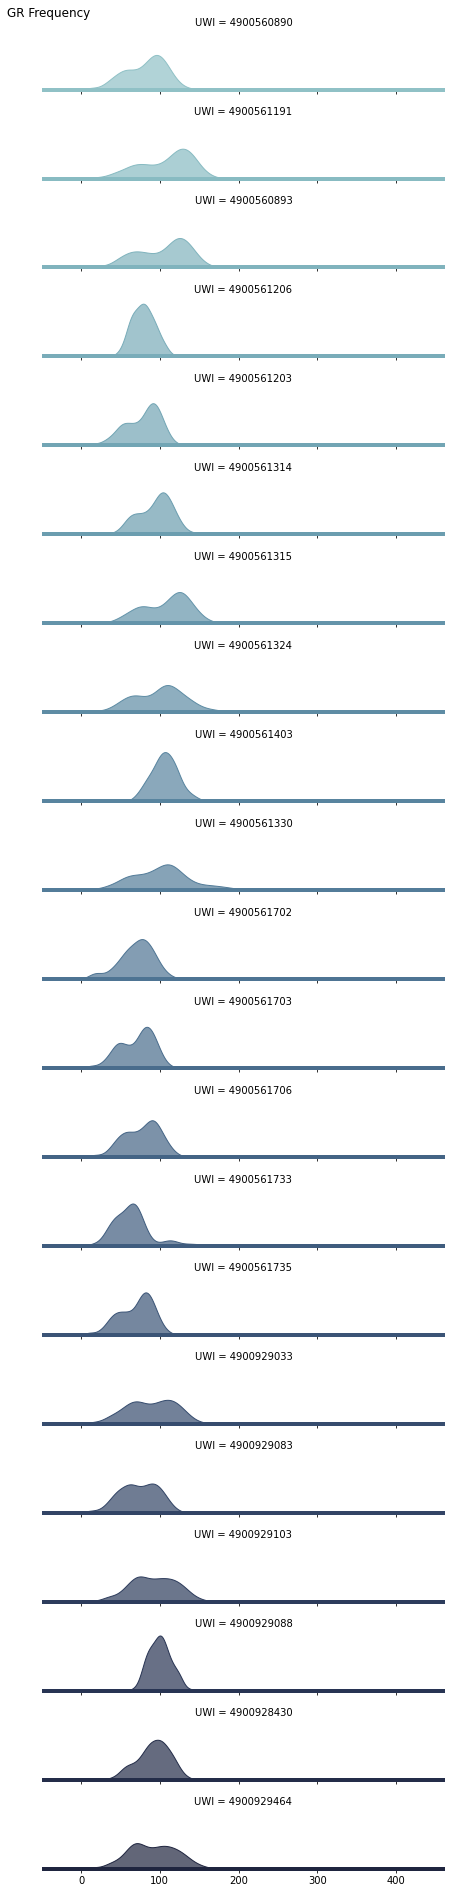

In [ ]:
pal = sns.cubehelix_palette(21, rot=-.25, light=.7)
ridge_plot = sns.FacetGrid(df5, row="UWI", hue="UWI", aspect=5, height=1.25, palette=pal)
ridge_plot.map(sns.kdeplot, "GR", clip_on=False, shade=True, alpha=0.7, lw=1, bw_adjust=2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)

ridge_plot.set(yticks=[])
ridge_plot.fig.suptitle('GR Frequency', x=0.1, y=1)
ridge_plot.despine(bottom=True, left=True);


***Petrophysical Work:***

We explored one of the two wells in our dataset that had a "full log suite". Zwell is the placeholder for when we wish to pull in a new well.

In [ ]:
zwell = df3[df3['UWI'] == '4900561314']
zwell.describe()
zwellorig = lasio.read('/content/gdrive/My Drive/GEOL557 Group Project/LAS Data/561314F.las')

To understand why we are using GR, RES, DENS, and PE as petrophysical indicators, it's important to have a basic understanding of why these values are important in petroleum geology.

Gamma Ray (or GR) is used to determine lithology. Generally speaking, a higher GR value could be shale where a lower GR value could be sandstone or limestone. Depending on the reservoir, sometimes we're "targetting" a sandstone for production (looking for lower GR values) and sometimes a shale.

Resistivity (or RES) in plain terms is the resisting power of a specified material to the flow of an electric current. As it relates to oil and gas, the more "resistive" the part of formation is, the higher amount of hydrocarbons it may have as oil "resists" an electric current.

Density (or DENS) is quantifying the porosity of the formation. It is a measurement to look at the "voids" in a rock. While these voids do not neccessarily contain hydrocarbons, it's important to know if the rock even has the pore space to contain a fluid or gas.

The Photoelectic Factor (or PE) is another indication of lithology like GR. It can be a good measure of when the formation is changing from say a shale to a sandstone in a qualitative way.

*Plotting GR, DENS, PE, RES by depth*

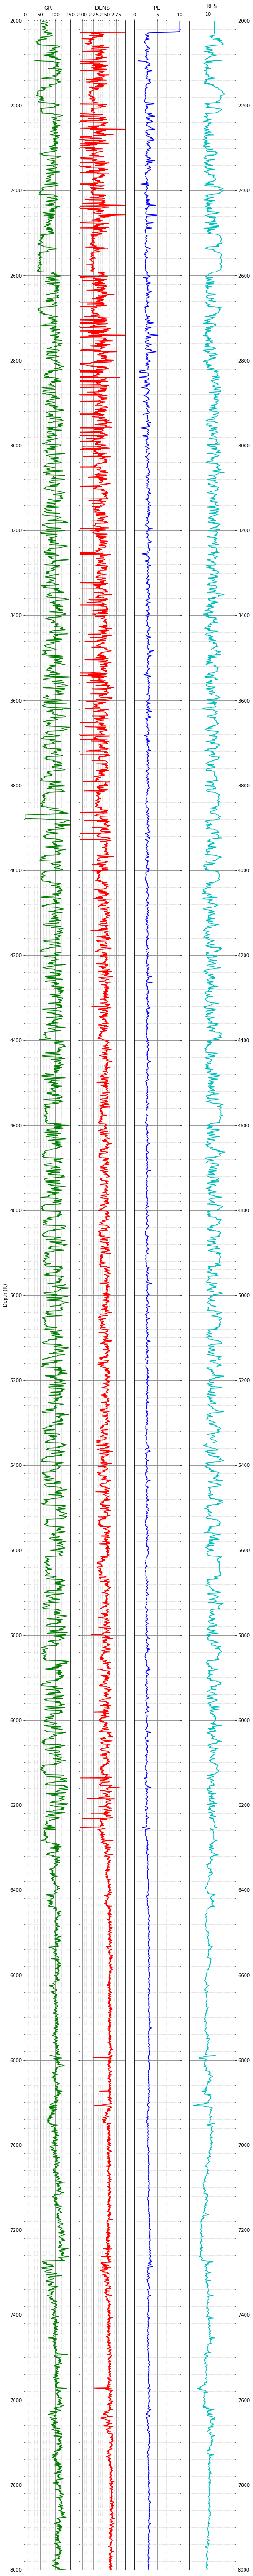

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(8,100))


ax[0].plot(zwell.GR.values, zwell.Depth.values, color='g')
ax[0].set_title('GR')
ax[0].set_ylabel('Depth (ft)')
ax[0].set_ylim(8000,2000)
ax[0].set_xlim(0,150)

ax[0].xaxis.set_major_locator(MultipleLocator(50))
ax[0].xaxis.set_minor_locator(MultipleLocator(10))
ax[0].yaxis.set_major_locator(MultipleLocator(200))
ax[0].yaxis.set_minor_locator(MultipleLocator(20))
ax[0].grid(which='major', color='gray', linestyle='-')
ax[0].grid(which='minor', color='lightgray', linestyle=':')
ax[0].xaxis.tick_top()

#plt.subplot(132)
ax[1].plot(zwell.DENS.values, zwell.Depth.values, color='r')
ax[1].set_title('DENS')
ax[1].axes.yaxis.set_ticklabels([])
ax[1].set_ylim(8000,2000)
ax[1].set_xlim(1.95, 2.95)

ax[1].xaxis.set_major_locator(MultipleLocator(.25))
ax[1].xaxis.set_minor_locator(MultipleLocator(.05))
ax[1].yaxis.set_major_locator(MultipleLocator(200))
ax[1].yaxis.set_minor_locator(MultipleLocator(20))
ax[1].grid(which='major', color='gray', linestyle='-')
ax[1].grid(which='minor', color='lightgray', linestyle=':')
ax[1].xaxis.tick_top()


#plt.subplot(133)
ax[2].plot(zwell.PE.values, zwell.Depth.values, color='b')
ax[2].set_title('PE')
ax[2].axes.yaxis.set_ticklabels([])
ax[2].yaxis.tick_right()
ax[2].set_ylim(8000,2000)
ax[2].set_xlim(0,10)

ax[2].xaxis.set_major_locator(MultipleLocator(5))
ax[2].xaxis.set_minor_locator(MultipleLocator(1))
ax[2].yaxis.set_major_locator(MultipleLocator(200))
ax[2].yaxis.set_minor_locator(MultipleLocator(20))
ax[2].grid(which='major', color='gray', linestyle='-')
ax[2].grid(which='minor', color='lightgray', linestyle=':')
ax[2].xaxis.tick_top()

#plt.subplot(133)
ax[3].plot(zwell.RESD.values, zwell.Depth.values, color='c')
ax[3].set_title('RES')
ax[3].yaxis.set_label_position("right")
ax[3].yaxis.tick_right()
ax[3].set_ylim(8000,2000)

ax[3].set_xscale('log')
ax[3].set_xlim(0.5,500)

#ax[3].xaxis.set_major_locator(MultipleLocator(100))
#ax[3].xaxis.set_minor_locator(MultipleLocator(5))
ax[3].yaxis.set_major_locator(MultipleLocator(200))
ax[3].yaxis.set_minor_locator(MultipleLocator(20))
ax[3].grid(which='major', color='gray', linestyle='-')
ax[3].grid(which='minor', color='lightgray', linestyle=':')
ax[3].xaxis.tick_top()

plt.show()

*Calculating our "cutoffs" for petrophysical values to be used in looking at prospective zones for hydrocarbon accumulation*

In [ ]:
lowGR = round(zwell.GR.quantile(.20),2)
lowGR

72.85

In [ ]:
highRES = round(zwell.RESD.quantile(.80),2)
highRES

28.15

In [ ]:
lowDEN = round(zwell.DENS.quantile(.20),2)
lowDEN

2.39

In [ ]:
payMapper = (zwell.GR.values <= lowGR) & (zwell.DENS <= lowDEN) & (zwell.RESD >= highRES)

In [ ]:
np.bincount(payMapper)

array([11543,   864])

We created a binary "Pay Flag" showing prospective zones for hydrocarbon accumulation based on GR, RES, and DENS. We used a cutoff for these 3 variables for when GR and DENS were in the lower quintile and RES was in the upper quintile. 

We chose these values conservatively as to not overlook zones of potential pay. These values can be changed easily depending on the basin you're in and knowing the specifics about the association between petrophysical paramaters and hydrocarbon production. For example, certain basins are productive at extremely low resistivity values, so maybe those reservoirs would look at the upper half of resistivity.

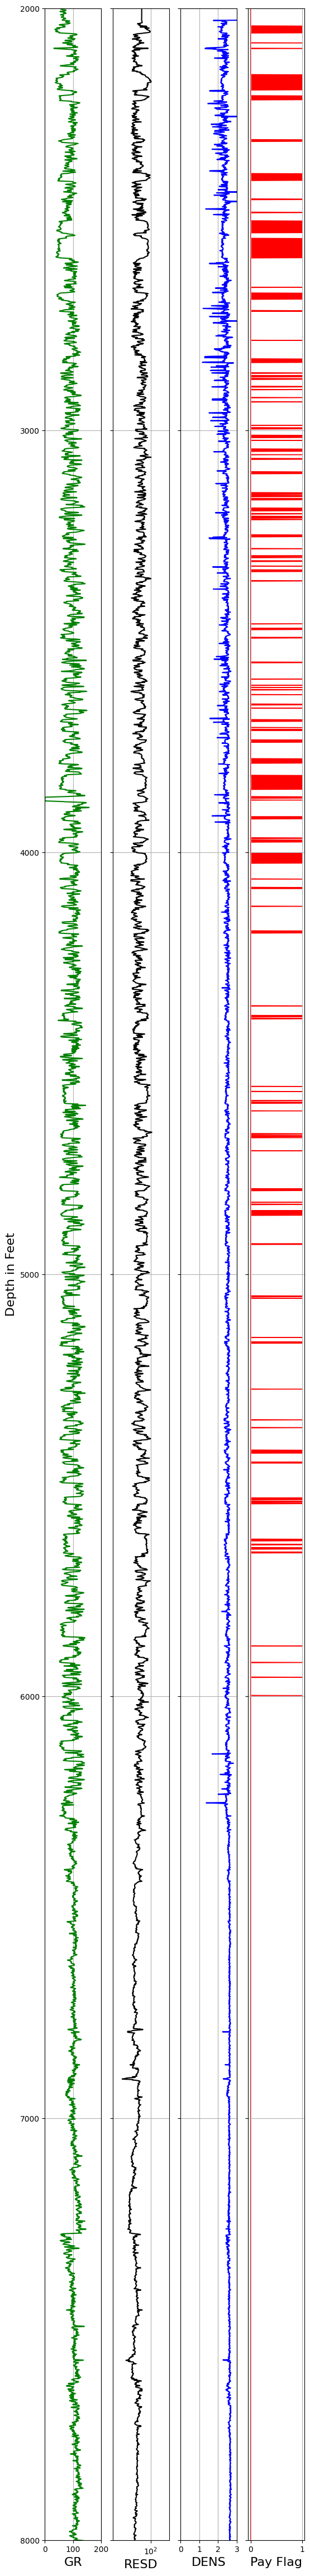

In [ ]:
plt.figure(figsize=(6,60), dpi=100)

plt.subplot(141) # the subplot changed to allow for 3 columns
plt.plot(zwell.GR.values, zwell.Depth.values, color='g')
plt.ylabel('Depth in Feet', size=16)
plt.xlabel('GR', size=16)
plt.ylim(8000,2000)
plt.grid(True)
plt.xlim(0,200)

plt.subplot(142)
plt.plot(zwell.RESD.values, zwell.Depth.values, color='black')
plt.xscale('log')
plt.grid(True)
plt.xlim(0.2,2000)
plt.ylim(8000,2000)
plt.xlabel('RESD', size=16)
plt.tick_params(labelleft=False)

plt.subplot(143)
plt.plot(zwell.DENS.values, zwell.Depth.values, color='blue')
plt.grid(True)
plt.xlim(0,3)
plt.ylim(8000,2000)
plt.xlabel('DENS', size=16)
plt.xticks(range(4), ['0','1', '2', '3'])
plt.tick_params(labelleft=False)

plt.subplot(144)
plt.fill_between(payMapper, zwellorig.index, color='red') 
plt.ylim(8000,2000)
plt.tick_params(labelleft=False)  
plt.xlabel('Pay Flag', size=16)
plt.grid(True)



# **Statistical Analysis**


In [ ]:
#Further cleaning data to faciliate statistical analysis
df6 = df5

df6.dropna(subset=['GR'], inplace=False)
df6.dropna(subset=['TEMP'], inplace=False)
df6.drop(df6[df6['GR']<1].index, inplace=True)
df6.drop(df6[df6['TEMP']<1].index, inplace=True)

df6.describe()

,Depth,GR,CAL,DT,SP,DENS,PE,AT90,RESD,RESM,RESS,PHIN,PHID,TEMP
count,573499.000000,568619.000000,43305.000000,12389.000000,33221.000000,33124.000000,33124.000000,33204.000000,33204.000000,33204.000000,33024.000000,32883.000000,33156.000000,200115.000000
mean,4924.581677,88.878419,33.747027,80.698860,-272.424936,2.266998,6.616483,133.600628,133.600628,62.493279,2923.511930,0.315933,-0.120243,120.711890
std,3038.589848,31.672034,143.676558,11.139238,34.095524,36.137904,36.360436,356.389038,356.389038,253.409727,2369.521097,0.240782,22.040271,43.638314
min,-108.000000,1.094800,-9.653400,55.390400,-342.083300,-5202.494600,-5204.210100,0.119500,0.119500,0.290500,0.066500,-0.101300,-4013.238900,1.070000
25%,2391.000000,66.106600,-5.042200,72.888400,-296.093800,2.429200,3.053700,10.573400,10.573400,7.292950,22.561525,0.215500,-0.015400,87.826700
50%,4780.750000,88.296500,-0.034400,78.394700,-265.500000,2.544650,10.000000,23.585650,23.585650,11.026450,4977.627000,0.254400,-0.010400,118.149800
75%,7162.750000,110.556100,0.307600,86.751600,-255.625000,2.628100,10.000000,61.334175,61.334175,22.981550,4998.696300,0.319350,-0.008300,150.952300
max,15879.000000,409.746100,2306.520000,138.486700,186.578900,4.628800,10.000000,1950.000000,1950.000000,1950.000000,5000.037100,7.908500,4.462500,534.999500


In order to assess if the GR, TEMP, or RESD is log-normal, we calculated the log10 for each of those data sets. 

In [ ]:
df6['log10GR'] = np.log10(df6.GR)
df6['log10RESD'] = np.log10(df6.RESD)
df6['log10TEMP'] = np.log10(df6.TEMP)
df6.describe()

,Depth,GR,CAL,DT,SP,DENS,PE,AT90,RESD,RESM,RESS,PHIN,PHID,TEMP,log10GR,log10RESD,log10TEMP
count,573499.000000,568619.000000,43305.000000,12389.000000,33221.000000,33124.000000,33124.000000,33204.000000,33204.000000,33204.000000,33024.000000,32883.000000,33156.000000,200115.000000,568619.000000,33204.000000,200115.000000
mean,4924.581677,88.878419,33.747027,80.698860,-272.424936,2.266998,6.616483,133.600628,133.600628,62.493279,2923.511930,0.315933,-0.120243,120.711890,1.915235,1.491219,2.052559
std,3038.589848,31.672034,143.676558,11.139238,34.095524,36.137904,36.360436,356.389038,356.389038,253.409727,2369.521097,0.240782,22.040271,43.638314,0.185393,0.636738,0.164418
min,-108.000000,1.094800,-9.653400,55.390400,-342.083300,-5202.494600,-5204.210100,0.119500,0.119500,0.290500,0.066500,-0.101300,-4013.238900,1.070000,0.039335,-0.922632,0.029384
25%,2391.000000,66.106600,-5.042200,72.888400,-296.093800,2.429200,3.053700,10.573400,10.573400,7.292950,22.561525,0.215500,-0.015400,87.826700,1.820245,1.024215,1.943627
50%,4780.750000,88.296500,-0.034400,78.394700,-265.500000,2.544650,10.000000,23.585650,23.585650,11.026450,4977.627000,0.254400,-0.010400,118.149800,1.945943,1.372648,2.072433
75%,7162.750000,110.556100,0.307600,86.751600,-255.625000,2.628100,10.000000,61.334175,61.334175,22.981550,4998.696300,0.319350,-0.008300,150.952300,2.043583,1.787703,2.178840
max,15879.000000,409.746100,2306.520000,138.486700,186.578900,4.628800,10.000000,1950.000000,1950.000000,1950.000000,5000.037100,7.908500,4.462500,534.999500,2.612515,3.290035,2.728353


Q-Q plots show whether a dataset is normally distributed.

The below Q-Q plots display GR and log10 GR. This indicateds that GR is not normally distributed in this data set with a large amount of values on the high end, and not a lot of GR values ~0-50 API range. Furthermore, GR is also not completely log10-normally distributed as it also does not form a straight positive line.

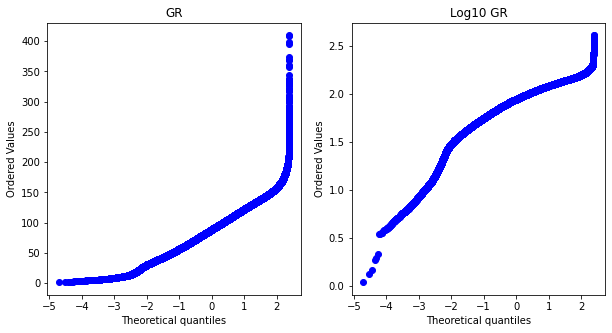

In [ ]:
fig, ax = plt.subplots(1,2, figsize=[10,5])
stats.probplot(df6.GR, plot=ax[0], dist='norm')
ax[0].set_title('GR')
stats.probplot((df6['log10GR']), plot=ax[1], dist='norm')
ax[1].set_title('Log10 GR');

The below Q-Q plots display TEMP and log10 TEMP. This indicates that TEMP and log10 TEMP are not normally distributed in this data set. Most of the temperature values are from ~0-250 degrees F.



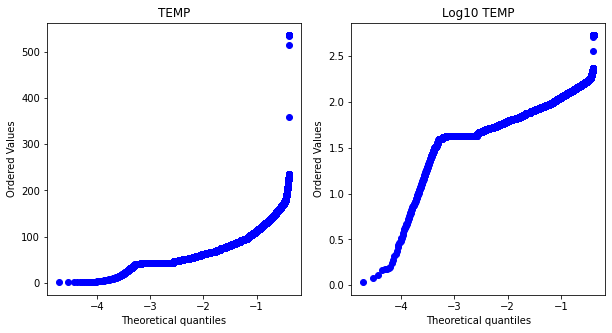

In [ ]:
fig, ax = plt.subplots(1,2, figsize=[10,5])
stats.probplot(df6.TEMP, plot=ax[0], dist='norm')
ax[0].set_title('TEMP')
stats.probplot((df6['log10TEMP']), plot=ax[1], dist='norm')
ax[1].set_title('Log10 TEMP');

The below plots are histogram distributions of Log10 GR and Log10 RESD of the entire dataset. Log10 GR shows a unimodal distribution that is skewed toward higher temperatures. Log10 RESD shows a bimodal distribution that is skewed toward lower values.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


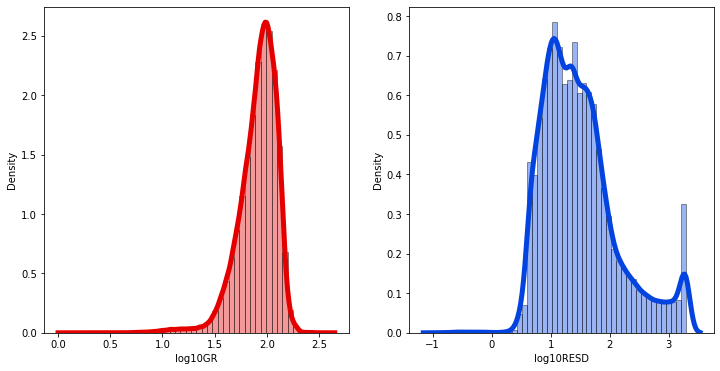

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[12,6], sharex=False);
sns.distplot(df6.log10GR, ax=ax1, hist=True, color='xkcd:red', hist_kws=dict(edgecolor="black"), kde_kws=dict(linewidth=5));
sns.distplot(df6.log10RESD, ax=ax2, hist=True, color='xkcd:blue',hist_kws=dict(edgecolor="black"), kde_kws=dict(linewidth=5));
plt.show()

Below are cumulative plots for linear vs logged GR Data.

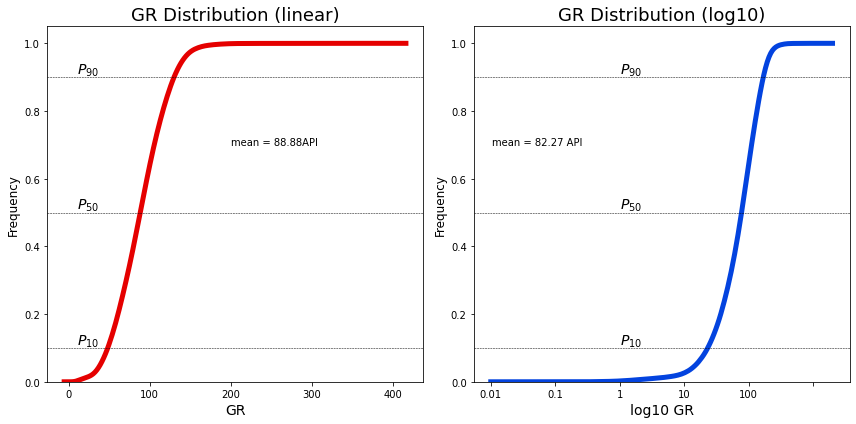

In [ ]:
fig, [ax, ax2] = plt.subplots(1,2, figsize=[12,6])

# linear data
sns.kdeplot(df6.GR, ax=ax, cumulative=True, color="xkcd:red", shade=False, linewidth=5, label='GR')


ax.set_xlabel('GR',fontsize=14)
ax.set_ylabel('Frequency',fontsize=12)
ax.set_title('GR Distribution (linear)',fontsize=18)

ax.axhline(y=0.1, color='k', linestyle='--', linewidth=0.5)
ax.text(10,0.11,r'$ P_{10}$',fontsize=14)

ax.axhline(y=0.5, color='k', linestyle='--', linewidth=0.5)
ax.text(10,0.51,r'$ P_{50}$',fontsize=14)

ax.axhline(y=0.9, color='k', linestyle='--', linewidth=0.5)
ax.text(10,0.91,r'$ P_{90}$',fontsize=14)

ax.text(200,0.7,'mean = '+str(round(df6.GR.mean(),2))+'API')

# logged data 

sns.kdeplot(df6.log10GR, ax=ax2, cumulative=True, color="xkcd:blue", shade=False, linewidth=5, label='Log10GR')

ax2.set_xlabel('log10 GR',fontsize=14)
#ax2.set_xlim(-3, 2)
ax2.set_xticklabels([10**p for p in range(-3, 3)])
ax2.set_ylabel('Frequency',fontsize=12)
ax2.set_title('GR Distribution (log10)',fontsize=18)

ax2.axhline(y=0.1, color='k', linestyle='--', linewidth=0.5)
ax2.text(1,0.11,r'$ P_{10}$',fontsize=14)

ax2.axhline(y=0.5, color='k', linestyle='--', linewidth=0.5)
ax2.text(1,0.51,r'$ P_{50}$',fontsize=14)

ax2.axhline(y=0.9, color='k', linestyle='--', linewidth=0.5)
ax2.text(1,0.91,r'$ P_{90}$',fontsize=14)

ax2.text(0.01,0.7,'mean = '+str(round(10**df6.log10GR.mean(),2))+' API')

plt.tight_layout()
plt.show()

It was interesting to see a difference of ~6.5API in the mean which shows how a non-normal data distribution can skew the mean.

Below are cumulative plots for linear vs logged TEMP Data.

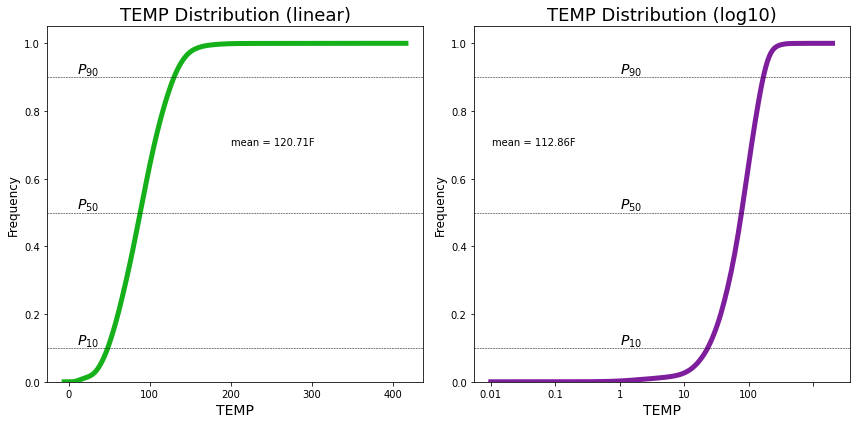

In [ ]:
fig, [ax, ax2] = plt.subplots(1,2, figsize=[12,6])

# linear data
sns.kdeplot(df6.GR, ax=ax, cumulative=True, color="xkcd:Green", shade=False, linewidth=5, label='GR')


ax.set_xlabel('TEMP',fontsize=14)
ax.set_ylabel('Frequency',fontsize=12)
ax.set_title('TEMP Distribution (linear)',fontsize=18)

ax.axhline(y=0.1, color='k', linestyle='--', linewidth=0.5)
ax.text(10,0.11,r'$ P_{10}$',fontsize=14)

ax.axhline(y=0.5, color='k', linestyle='--', linewidth=0.5)
ax.text(10,0.51,r'$ P_{50}$',fontsize=14)

ax.axhline(y=0.9, color='k', linestyle='--', linewidth=0.5)
ax.text(10,0.91,r'$ P_{90}$',fontsize=14)

ax.text(200,0.7,'mean = '+str(round(df6.TEMP.mean(),2))+'F')

# logged data 

sns.kdeplot(df6.log10GR, ax=ax2, cumulative=True, color="xkcd:Purple", shade=False, linewidth=5, label='Log10GR')

ax2.set_xlabel('TEMP',fontsize=14)
#ax2.set_xlim(-3, 2)
ax2.set_xticklabels([10**p for p in range(-3, 3)])
ax2.set_ylabel('Frequency',fontsize=12)
ax2.set_title('TEMP Distribution (log10)',fontsize=18)

ax2.axhline(y=0.1, color='k', linestyle='--', linewidth=0.5)
ax2.text(1,0.11,r'$ P_{10}$',fontsize=14)

ax2.axhline(y=0.5, color='k', linestyle='--', linewidth=0.5)
ax2.text(1,0.51,r'$ P_{50}$',fontsize=14)

ax2.axhline(y=0.9, color='k', linestyle='--', linewidth=0.5)
ax2.text(1,0.91,r'$ P_{90}$',fontsize=14)

ax2.text(0.01,0.7,'mean = '+str(round(10**df6.log10TEMP.mean(),2))+'F')

plt.tight_layout()
plt.show()

The linear temperature distribution had a higher mean due to the skew in the distribution toward higher temperature values. 

Next, Depth vs Temperature is compared in a scatter plot. The line of best fit is added.

In [ ]:
#Twell is the placeholder for any well to complete following Temp vs. Depth Analysis 
Twell = df6[df6['UWI'] == '4900560893']
Twell.dropna(subset=['TEMP'], inplace=True)
Twell

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UWI,Depth,GR,CAL,DT,SP,DENS,PE,AT90,RESD,RESM,RESS,PHIN,PHID,TEMP,log10GR,log10RESD,log10TEMP
75359,4900560893,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.2285,NaN,NaN,1.645702
75360,4900560893,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.2402,NaN,NaN,1.645817
75361,4900560893,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.2598,NaN,NaN,1.646009
75362,4900560893,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.2812,NaN,NaN,1.646219
75363,4900560893,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.2973,NaN,NaN,1.646377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110908,4900560893,8888.00,105.9864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.2522,2.025250,NaN,2.026338
110909,4900560893,8888.25,102.0234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.5660,2.008700,NaN,1.789341
110910,4900560893,8888.50,99.4341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8272,1.997535,NaN,1.412077
110911,4900560893,8888.75,97.9962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.4927,1.991209,NaN,0.874638


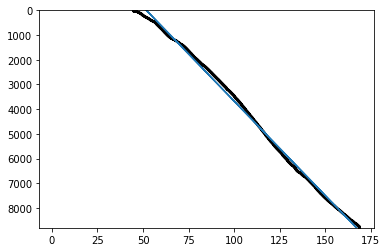

In [ ]:
plt.scatter(x=Twell.TEMP, y=Twell.Depth, color='k', s=0.2)
plt.ylim((8800,0))
x=Twell.TEMP
y=Twell.Depth
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b);

Parametric Statistic: t-test

In [ ]:
stats.ttest_ind(Twell.TEMP, Twell.Depth)

Ttest_indResult(statistic=-318.5150997284063, pvalue=0.0)

Nonparametric Statistic: ks-test

In [ ]:
stats.ks_2samp(Twell.TEMP, Twell.Depth)

Ks_2sampResult(statistic=0.9811272993193452, pvalue=0.0)

R-squared score for temperature compared to depth

In [ ]:
correlation_matrix = np.corrcoef(Twell.TEMP, Twell.Depth)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.9945111874886732


We observed a nearly perfect r-squared score. We would have expected a strong correlation between depth and temperature, however, 0.9945 was higher than we would have imagined as there can be temperature anomolies.

# **Discussion**

After the data was cleaned, we were able to analyze and visualize different relationships and make inferences on our dataset. The relationship between the photoelectric factor and density indicated a clay dominated lithology with the occurance of a calcite dominated lithology also present. Subsurface temperatures ranged from ~50-250°F, with a mean of 120.71°F, and a strong linear depth and temperature relationship. Gamma ray values consistently range from ~25-175 API across the dataset, and overall displayed a unimodal distribution. 

Pay flags were determined at depths where gamma ray, resistivity, and density all satisfied a specific requirement. These requirements were set using domain knowledge and indicate prospective hydrocarbon accumulations. With numerous benches being flagged, there is strong potential to find oil and gas at more than one depth range in section 41N-72W Wyoming. Python has proved to be a powerful tool when looking at different ways to wrangle, visualize, and analyze LAS data. 


# **Conclusions**

This project was a great way for us to gain experience using Python for data mining, wrangling, cleaning, and analysis for geophysical log data. We believe that anyone who works with large, messy LAS datasets would find this process valuable. We started with 94 wells worth of raw data from a state website. From here, we were able to parse that dataset down to 20 wells with cleaned data, and then find 2 wells that would be particularly useful for a "deeper dive". Thinking about this proof of concept on a larger scale, it would be an enormous time-saver to take 100,000 las files and quickly say only ~20-25% are useful, and only a few hundred had a full log suite for a more sophisticated petrophysical model.
